## <span style="color:#87cefa">Decision Trees for Classification and Regression</span>

##### <span style="color:#87ceeb">Learn about decision trees, how they work and how they can be used for classification and regression tasks.</span>

### Introduction

Decision trees are a common type of machine learning model used for binary classification tasks. The natural structure of a binary tree lends itself well to predicting a "yes" or "no" target. It is traversed sequentially here by evaluating the truth of each logical statement until the final prediction outcome is reached. Some examples of classification tasks that can use decision trees are: predicting whether a student will pass or fail an exam, whether an email is spam or not, if a transaction is fraudulent or legitimate, etc.

Decision trees can also be used for regression tasks! Predicting the grade of a student on an exam, the number of spam emails per day, the amount of fraudulent transactions on a platform, etc. are all possible using decision trees. The algorithm works pretty much the same way, with modifications only to the splitting criteria and how the final output is computed. In this article, we will explore both a binary classification and regression model using decision trees with the [Indian Graduate Admissions dataset](https://www.kaggle.com/mohansacharya/graduate-admissions).

### Dataset

The data contains features commonly used in determining admission to masters' degree programs, such as GRE, GPA, and letters of recommendation. The complete list of features is summarized below:

- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (eithter 0 or 1)
- Chance of Admit (ranging from 0 to 1)

We're going to begin by loading the dataset as a <span style="color:#4fe0b0">pandas DataFrame</span>.

### Decision Trees for Classification: A Recap

As a first step, we will create a binary class (1=admission likely, 0:admission unlikely) from the <span style="color:#4fe0b0">chance of admit</span> - greater than 80% we will consider as likely. The remaining data columns will be used as predictors.

### Fitting and predicting

We will use <span style="color:#4fe0b0">scikit-learn</span>'s tree module to create, train, predict, and visualize a decision tree classifier. The syntax is the same as other models in scikit-learn, once an instance of the model class is instantiated with <span style="color:#4fe0b0">dt = DecisionTreeClassifier()</span>,<span style="color:#4fe0b0">.fit()</span> can be used to fit the model on the training set. After fitting, <span style="color:#4fe0b0">.predict()</span> (and <span style="color:#4fe0b0">predict_proba()</span>) and <span style="color:#4fe0b0">.score()</span> can be called to generate predictions and score the model on the test data.

As with other <span style="color:#4fe0b0">scikit-learn</span> models, only numeric data can be used (categorical variables and nulls must be handled prior to model fitting). In this case, our categorical features have already been transformed and no missing values are present in the data set.

Two methods are available to visualize the tree within the tree module -the first is using <span style="color:#4fe0b0">tree_plot</span> to graphically represent the decision tree. The second uses <span style="color:#4fe0b0">export_text</span> to list the rules behind the splits in the decision tree.There are many other packages available for more visualization options -such as <span style="color:#4fe0b0">graphviz</span>, but may require additional instalations and will not be covered here.

### Split Criteria
For a classification task, the default split criteria is Gini impurity -this gives us a measure of how "impure" the groups are. At the root node, the first split is then chosen as the one that maximizes the information gain, i.e. decreases the Gini impurity the most. Our tree has already been built for us, but how was the split <span style="color:#4fe0b0">cgpa<=8.845</span> determined? <span style="color:#4fe0b0">cgpa</span> is a continuous variable, which adds an extra complication, as the split can occur for ANY value of <span style="color:#4fe0b0">cgpa</span>.

To verify, we will use the defined functions <span style="color:#4fe0b0">gini</span> and <span style="color:#4fe0b0">info_gain</span>. By running <span style="color:#4fe0b0">gini(y_train)</span>, we get the same Gini impurity value as printed in the tree at the root node, <span style="color:#4fe0b0">0.443</span>.

Next, we are going to verify how the split on <span style="color:#4fe0b0">cgpa</span> was determined, i.e. where did the <span style="color:#4fe0b0">8.845</span> value come from. We will use <span style="color:#4fe0b0">info_gain</span> over ALL values of <span style="color:#4fe0b0">cgpa</span> to determine the information gain when split on each value. This is stored in a table and sorted. The top value for the split is `cgpa<=8.845`. This is also done for every other feature (and for those continous ones, every value), to find the top split overall.

After this process is repeated, and there is no further info gain by splitting, the tree is finally built. Last to evaluate, any sample traverses through tree and appropriate splits until it reaches a leaf node, and then assigned the majority class of theat leaf (or weighted majority).

## <span style="color:#87cefa">Script.py</span>

0.925
0.925


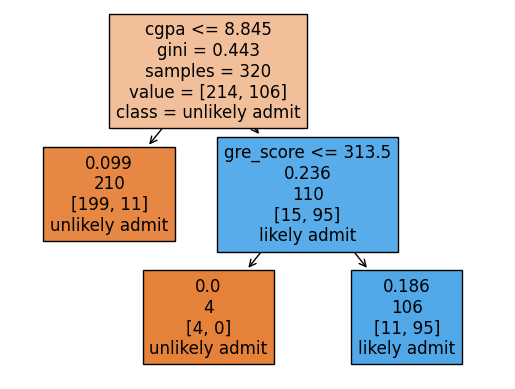

|--- cgpa <= 8.85
|   |--- class: False
|--- cgpa >  8.85
|   |--- gre_score <= 313.50
|   |   |--- class: False
|   |--- gre_score >  313.50
|   |   |--- class: True

Gini impurity at root: 0.443


Text(0, 0.5, 'info gain')

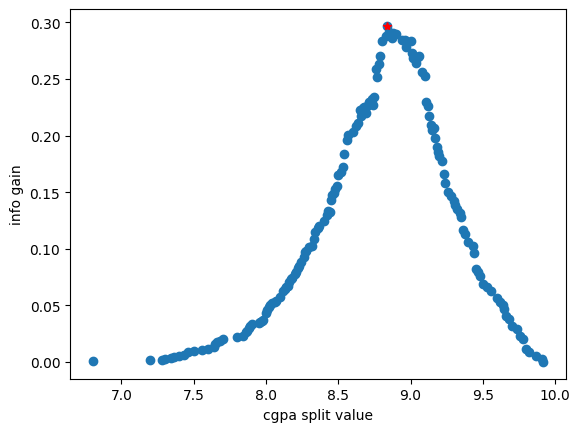

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Dataset import
df = pd.read_csv("Admission_Predict.csv")
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()

# Creating a binary class
X = df.loc[:, 'gre_score':'research']
y = df['chance_of_admit']>=.8

# Fitting and Predicting
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

dt = DecisionTreeClassifier(max_depth=2, ccp_alpha=0.01, criterion='gini')

dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print(dt.score(x_test, y_test))

print(accuracy_score(y_test, y_pred))

# Visualize the tree (Two methods)
tree.plot_tree(dt, feature_names=x_train.columns, max_depth=3, class_names=['unlikely admit', 'likely admit'], label='root', filled=True)
plt.show()
plt.close()
print(tree.export_text(dt, feature_names = X.columns.tolist()))

# Split Criteria
def gini(data):
    """Calculate the Gini Impurity Score
    """
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize=True)**2)

gi = gini(y_train)
print(f'Gini impurity at root: {round(gi,3)}')

def info_gain(left, right, current_impurity):
    """Information Gain associated with creatinga node/split data.
    Input: left, right are data in left branch, right branch, respectively
    current_impurity is the data impurity before splitting into left, right branches
    """
    # weight for gini score of the left branch
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1 - w) * gini(right)

# cgpa was determined as the best root to split. Now info_gain over all values of cgpa.
info_gain_list = []
for i in x_train.cgpa.unique():
    left = y_train[x_train.cgpa<=i]
    right = y_train[x_train.cgpa>i]
    info_gain_list.append([i, info_gain(left, right, gi)])

ig_table = pd.DataFrame(info_gain_list, columns=['split_value', 'info_gain']).sort_values('info_gain', ascending=False)
ig_table.head(10)

plt.plot(ig_table['split_value'], ig_table['info_gain'], 'o')
plt.plot(ig_table['split_value'].iloc[0], ig_table['info_gain'].iloc[0], 'r*')
plt.xlabel('cgpa split value')
plt.ylabel('info gain')

### Regression

For the regression problem, we will use the unaltered <span style="color:#4fe0b0">chance_of_admit</span> target, which is a floating point value between 0 and 1.

### Fitting and Predicting

The syntax is identical as the decision tree classifier, except the target, <span style="color:#4fe0b0">y</span>, must be real-valued and the model used must be <span style="color:#4fe0b0">DecisionTreeRegressor()</span>. As far as the model hyperparameters go, almost all are the same, except for the split criterion. The split criterion now needs be suitable for a regression task -the default for regression is Mean Squared Error (or MSE).

Similarly, the tree can be visualized using <span style="color:#4fe0b0">tree.plot_tree</span> -keeping in mind the splitting criteria is <span style="color:#4fe0b0">mse</span> and the <span style="color:#4fe0b0">value</span> is the average <span style="color:#4fe0b0">chance_of_admit</span> of all samples on that leaf.

### Split Criteria

Unlike the classification problem, there are no longer classes to split the tree by. Instead, at each level, the value is the *average* of all samples that fit the logical criteria. In terms of evaluating the split, the default method is MSE. For example, the root node, the average target value is 0.727 (verify <span style="color:#4fe0b0">y_train.mean()</span>). Then the MSE (mean-squared error) if we were to use 0.727 as the value for all samples, would be: 

<span style="color:#4fe0b0">np.mean((y_train - y_train.mean())**2) = 0.02029</span>

Now to determine the split, for each value of <span style="color:#4fe0b0">cpga</span>, the information gain, or decrease in MSE after the split, is calculated and then values are sorted. Like before, we can modify our functions for the regression version, and see the best split is again <span style="color:#4fe0b0">cpga<=8.84</span>.

The below code walks you through the details -in the regression version, instead of Gini impurity, MSE is used, and the information gain function is modified to <span style="color:#4fe0b0">mse_gain</span>.


Again, the process will continue until there is no increase in information gain by splitting. Now that the tree has been built, evaluation occurs in pretty much the same way. Any sample traverses through the tree until it reaches a leaf node and is then assigned the average value of the samples in leaf. Depending on the depth of the tree, *the predicted values can be limited.* In this example, only four unique predicted values are possible, which we can verify. This is something to be aware of when using a decision tree regressor, unlike linear/logistic regression, not all output values may be possible.

## <span style="color:#87cefa">Script.py</span>

0.5230242793515553


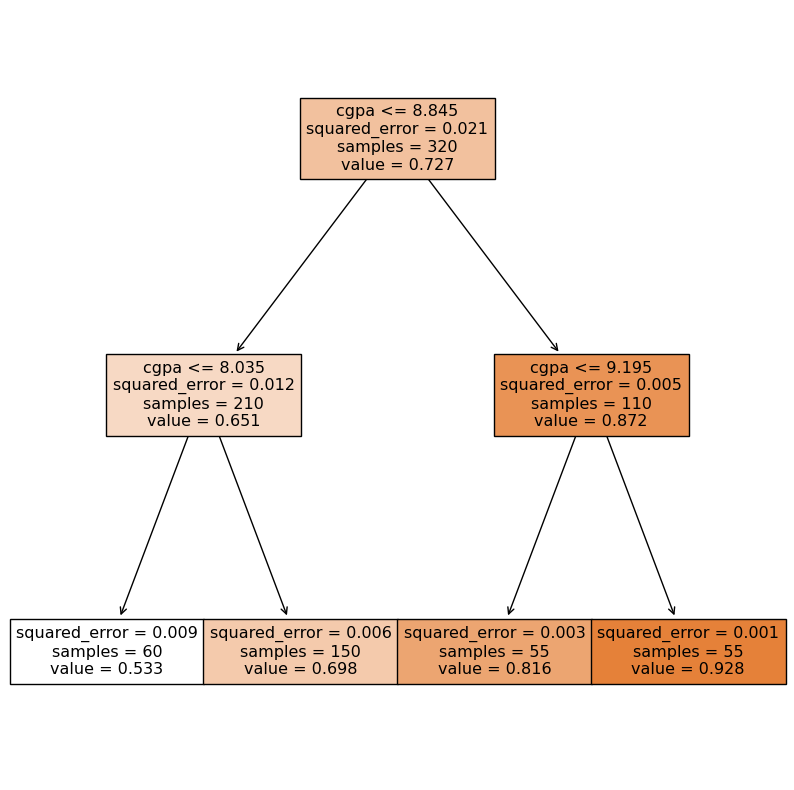

MSE at root: 0.021
     split_value  info_gain
10          8.84   0.011065
96          8.80   0.011037
98          8.83   0.011023
124         8.85   0.010985
125         8.73   0.010939
110         8.87   0.010932
139         8.88   0.010895
1           8.70   0.010894
17          8.76   0.010858
140         8.74   0.010850


array([0.53283333, 0.6976    , 0.81618182, 0.92781818])

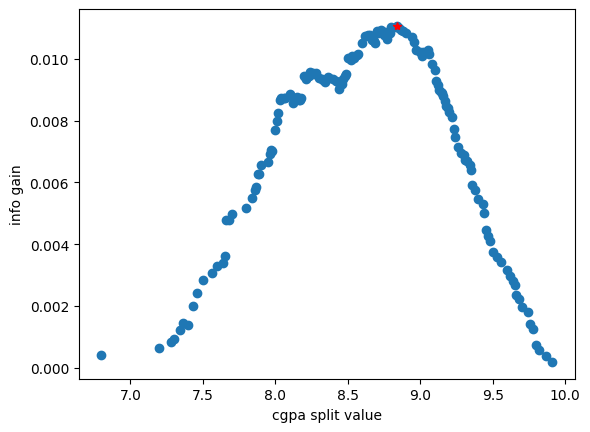

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Dataset import
df = pd.read_csv("Admission_Predict.csv")
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()

# Unaltered chance_of_admit
X = df.loc[:,'gre_score':'research']
y = df['chance_of_admit']

# Fitting and Predicting a Regression
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
dt = DecisionTreeRegressor(max_depth=3, ccp_alpha=0.001)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(dt.score(x_test, y_test))

#Visualizing the tree
plt.figure(figsize=(10,10))
tree.plot_tree(dt, feature_names=x_train.columns, max_depth=2, filled=True)
plt.show()
plt.close()

def mse(data):
    """Calculate the MSE of a data set
    """
    return np.mean((data - data.mean())**2)

def mse_gain(left, right, current_mse):
    """Information gain (MSE)associated with creating a node/split data based on MSE.
    Imput: left, right are data in left branch, right branch, respectively
    """
    w = float(len(left)) / (len(left) + len(right))
    return current_mse - w * mse(left) - (1 - w) * mse(right)

m = mse(y_train)
print(f'MSE at root: {round(m,3)}')

mse_gain_list = []
for i in x_train.cgpa.unique():
    left = y_train[x_train.cgpa<=i]
    right = y_train[x_train.cgpa>i]
    mse_gain_list.append([i, mse_gain(left, right, m)])

mse_table = pd.DataFrame(mse_gain_list, columns=['split_value', 'info_gain']).sort_values('info_gain', ascending=False)
print(mse_table.head(10))

plt.plot(mse_table['split_value'], mse_table['info_gain'], 'o')
plt.plot(mse_table['split_value'].iloc[0], mse_table['info_gain'].iloc[0],'r*')
plt.xlabel('cgpa split value')
plt.ylabel('info gain')

np.unique(dt.predict(x_train))

## Summary

We've seen how decision trees can be used for both classification and regression tasks.

- The fundamental difference is that for classification, splits are based on Gini impurity error calculations whereas for regression, Mean Squared Error minimization is used.

- Tree traversal based on information gain and evaluation works pretty much the same way for both tasks.

- Decision tree regressors differ from other regressors in that all output values may not be possible and it depends on the depth of the tree.